# **Assignment: K-Nearest Neighbors & Support Vector Machines for Iris Classification**

## **Objective**  
Train and evaluate **K-Nearest Neighbors (KNN)** and **Support Vector Machines (SVM)** models to classify Iris species based on features like petal length, petal width, sepal length, and sepal width.

---

## **Dataset**  
Use the **Iris dataset** from `sklearn.datasets`. Load it into a Pandas DataFrame and display the first few rows.

---

## **Tasks**  

### **1. Data Preprocessing**  
- Load the **Iris dataset** and check for missing values.  
- Split the dataset into **80% training and 20% testing**.  
- Standardize the features using **StandardScaler**.  

---

### **2. Train K-Nearest Neighbors (KNN) Model**  
- Train a **K-Nearest Neighbors classifier** with the default parameters (use `KNeighborsClassifier` from `sklearn`).  
- Evaluate the model’s performance using accuracy.  
- Experiment with different values of `k` (e.g., 3, 5, 7) and analyze the performance.  

---

### **3. Train Support Vector Machines (SVM) Model**  
- Train a **Support Vector Machine classifier** with the default parameters (use `SVC` from `sklearn`).  
- Evaluate the model’s performance using accuracy.  
- Try different kernels (linear, rbf) and analyze the performance for each kernel.

---

### **4. Hyperparameter Tuning**  
- Use **GridSearchCV** to tune the following hyperparameters for both KNN and SVM models:  
  - For KNN:  
    - `n_neighbors` (Number of neighbors)  
    - `metric` (Distance metric, e.g., 'euclidean', 'manhattan')  
  - For SVM:  
    - `C` (Regularization parameter)  
    - `kernel` (e.g., 'linear', 'rbf')  
    - `gamma` (Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’)  

---

### **5. Model Evaluation**  
- Compute and print the following metrics for both KNN and SVM models (default and tuned):  
  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1-Score**  
  - **Confusion Matrix**  

---

### **6. Visualization**  
- Plot the **Confusion Matrix** for both models to evaluate performance.  
- Plot the **ROC curve** for both models to visualize the trade-off between True Positive Rate and False Positive Rate.

---


## **Submission Guidelines**  
- Submit a **Colab Notebook (.ipynb)** with code and visualizations.  



# Load Dataset


In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Check for Missing Values


In [2]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [3]:
X = df.drop('target', axis=1)
y= df['target']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy with default k: {accuracy}")

Accuracy with default k: 1.0


In [8]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy with  k 3: {accuracy}")

Accuracy with  k 3: 1.0


In [9]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred = knn5.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy with  k 5: {accuracy}")

Accuracy with  k 5: 1.0


In [10]:
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train, y_train)
y_pred = knn7.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy with  k 7: {accuracy}")

Accuracy with  k 7: 1.0


In [11]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [12]:
y_pred_svm = svm.predict(X_test)
print("SVM Default Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Default Accuracy: 1.0


# 🔄 Try Different Kernels


In [13]:
for kernel in ['linear', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred_kernel = model.predict(X_test)
    print(f"SVM ({kernel}) Accuracy:", accuracy_score(y_test, pred_kernel))

SVM (linear) Accuracy: 0.9666666666666667
SVM (rbf) Accuracy: 1.0


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid_knn ={
    'n_neighbors' : [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9}


# 🔍 SVM GridSearch


In [15]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid.fit(X_train, y_train)
print("Best SVM Params:", svm_grid.best_params_)

Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


# 📈 Function to Print Evaluation Metrics


In [16]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
def evaluate_model(name, y_true, y_pred):
    print(f"\n📋 {name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_true, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# 🔍 Evaluate All Models
evaluate_model("KNN Default", y_test, y_pred)
evaluate_model("SVM Default", y_test, y_pred_svm)
evaluate_model("KNN Tuned", y_test, grid_search_knn.predict(X_test))
evaluate_model("SVM Tuned", y_test, svm_grid.predict(X_test))



📋 KNN Default Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

📋 SVM Default Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

📋 KNN Tuned Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

📋 SVM Tuned Evaluation:
Accuracy: 0.9666666666666667
Precision: 0.9722222222222222
Recall: 0.9629629629629629
F1 Score: 0.9658994032395567
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


# 🔢 Confusion Matrix Plot


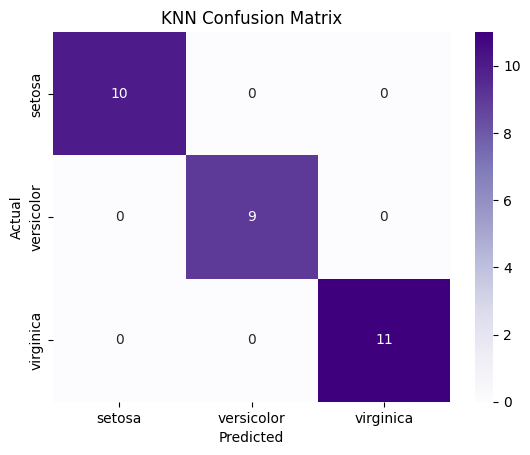

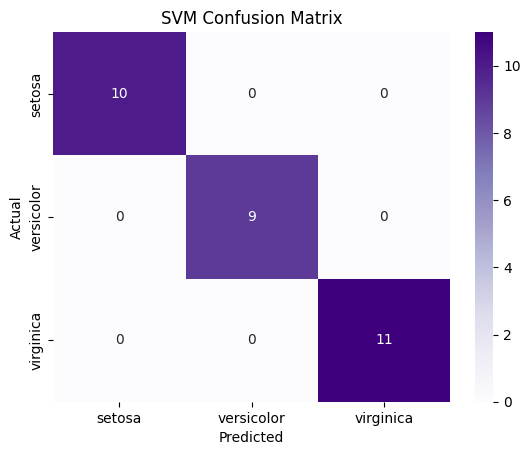

In [21]:
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, y_pred, "KNN Confusion Matrix")
plot_conf_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")

# 🧪 ROC Curve (For multi-class)


In [19]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

def plot_roc(model, X, y_bin, title):
    y_score = model.decision_function(X) if hasattr(model, "decision_function") else model.predict_proba(X)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Plot ROC Curves


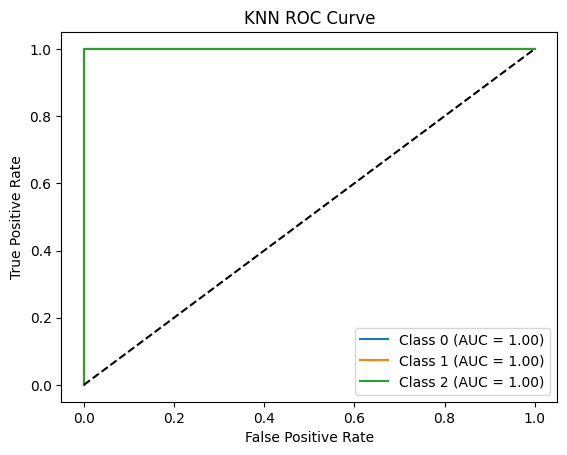

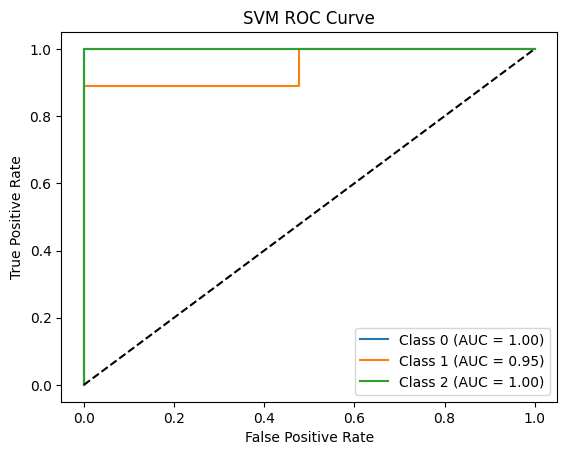

In [20]:
plot_roc(grid_search_knn.best_estimator_, X_test, y_test_bin, "KNN ROC Curve")
plot_roc(svm_grid.best_estimator_, X_test, y_test_bin, "SVM ROC Curve")